In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 선형 회귀

### 1-1. 정규방정식

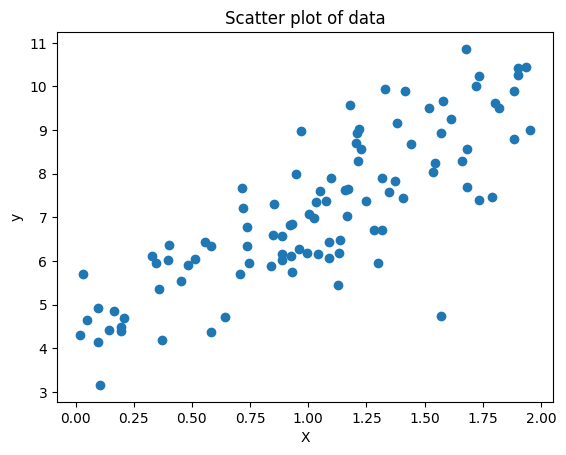

In [3]:
# 임의의 선형(처럼 보이는) 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 시각화
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [4]:
# 정규방정식을 사용한 해석학적 계산 방법
X_b = np.c_[np.ones((100, 1)), X]    # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    # inv(): 역행렬 계산
theta_best

array([[4.29040019],
       [2.74873623]])

> 데이터를 생성하기 위해 사용한 함수는 `y = 4 + 3x + 가우시안잡음'이며, 정규방정식을 통해 계산한 값은 이와 비슷한 파라미터를 재현하였다.

In [5]:
# 임의의 값에 대한 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    # 모든 샘플에 x0 = 1을 추가(행렬 연산에서 상수항을 계산하기 위한 목적)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.29040019],
       [9.78787266]])

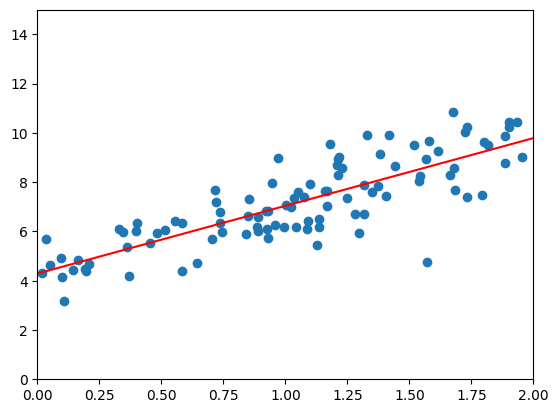

In [6]:
# 예측 모델 시각화
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# 사이킷런을 사용한 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)    # 가중치, 편향 확인
lin_reg.predict(X_new)

[4.29040019] [[2.74873623]]


array([[4.29040019],
       [9.78787266]])

> LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 하므로 직접 호출할 수도 있다.
> - scipy.linalg.lstsq() 함수는 $\hat{\theta}=\rm{X^+y}$을 계산한다.
> - 이때 $\rm{X^+}$는 `유사역행렬(pseudoinverse)`이며, 이는 `np.linalg.pinv()` 함수를 사용하여 직접 구할 수도 있다.

In [9]:
# scipy를 사용한 최적의 가중치 및 편향 계산
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # lstsq(): 최소자승법
theta_best_svd

array([[4.29040019],
       [2.74873623]])

In [10]:
# 유사역행렬 확인
np.linalg.pinv(X_b).dot(y)

array([[4.29040019],
       [2.74873623]])

# 2. 경사하강법

In [11]:
# 배치경사하강법 알고리즘 구현
eta = 0.1              # 학습률
n_iterations = 1000    # 반복 횟수
m = 100                # 샘플 수

theta = np.random.randn(2, 1)    # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 비용함수의 편도함수
    theta = theta - eta * gradients   # 경사하강법 스텝

print(theta)

[[4.29040019]
 [2.74873623]]


In [13]:
# 확률적 경사하강법 알고리즘 구현
n_epochs = 50
t0, t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):   # 학습 스케줄 함수: 매 반복에서 학습률을 결정하는 함수 -> 학습률을 점진적으로 감소시킴(지역 최솟값을 어느정도 방지)
    return t0 / (t + t1)

theta = np.random.randn(2, 1)    # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.29444152]
 [2.76104597]]


In [14]:
# 사이킷런을 사용한 확률적 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)    # max_iter: 반복 횟수, tol: 반복 중지 조건, penalty: 규제, eta0: 학습률 초깃값
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.28497188] [2.79581153]
